<b><H1>Project Name : Help Twitter Combat Hate Speech Using NLP and Machine Learning</H1></b><br>
Name: Daniel Manova<br>
Date: 13-03-2022<br>
Course: Post Graduate Program in AI and Machine Learning<br>
Cohort : PGP AIML JUN 2021 Cohort 1<br>

<b>Help Twitter Combat Hate Speech Using NLP and Machine Learning</b>

<b>Description:</b> Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

<b>Problem Statement:</b>  
Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

<b>Domain:</b> Social Media

<b>Analysis to be done:</b>: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 
id: identifier number of the tweet
Label: 0 (non-hate) /1 (hate)
Tweet: the text in the tweet

<b>Tasks:</b>
1.	Load the tweets file using read_csv function from Pandas package. 
2.	Get the tweets into a list for easy text cleanup and manipulation.
3.	To cleanup:
        1. Normalize the casing.
        2. Using regular expressions, remove user handles. These begin with '@’.
        3. Using regular expressions, remove URLs.
        4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
        5. Remove stop words.
        6. Remove redundant terms like ‘amp’, ‘rt’, etc.
        7. Remove ‘#’ symbols from the tweet while retaining the term.
4.	Extra cleanup by removing terms with a length of 1.
5.	Check out the top terms in the tweets:
        1. First, get all the tokenized terms into one large list.
        2. Use the counter and find the 10 most common terms.
6.	Data formatting for predictive modeling:
        1. Join the tokens back to form strings. This will be required for the vectorizers.
        2. Assign x and y.
        3. Perform train_test_split using sklearn.
7.	We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
        1. Import TF-IDF  vectorizer from sklearn.
        2. Instantiate with a maximum of 5000 terms in your vocabulary.
        3. Fit and apply on the train set.
        4. Apply on the test set.
8.	Model building: Ordinary Logistic Regression
        1. Instantiate Logistic Regression from sklearn with default parameters.
        2. Fit into  the train data.
        3. Make predictions for the train and the test set.
9.	Model evaluation: Accuracy, recall, and f_1 score.
        1. Report the accuracy on the train set.
        2. Report the recall on the train set: decent, high, or low.
        3. Get the f1 score on the train set.
10.	Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
        1. Adjust the appropriate class in the LogisticRegression model.
11.	Train again with the adjustment and evaluate.
        1. Train the model on the train set.
        2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
12.	Regularization and Hyperparameter tuning:
        1. Import GridSearch and StratifiedKFold because of class imbalance.
        2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
        3. Use a balanced class weight while instantiating the logistic regression.
13.	Find the parameters with the best recall in cross-validation.
        1. Choose ‘recall’ as the metric for scoring.
        2. Choose a stratified 4 fold cross-validation scheme.
        3. Fit into  the train set.
14.	What are the best parameters?
15.	Predict and evaluate using the best estimator.
        1. Use the best estimator from the grid search to make predictions on the test set.
        2. What is the recall on the test set for the toxic comments?
        3. What is the f_1 score?


## Initialize all necessary packages

In [1]:
# Pandas is used for data manipulation and analysis
import pandas as pd
import re
import string
from string import punctuation

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

import unicodedata

from collections import Counter

#Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
import matplotlib.pyplot as plt

from wordcloud import WordCloud

#textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#import the metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Used to supress display of warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the tweets file using read_csv function from Pandas package:

In [2]:
df_tweets = pd.read_csv('TwitterHate.csv',delimiter=',',engine='python',encoding='utf-8-sig')
df_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#check for the null values
df_tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Get the tweets into a list for easy text cleanup and manipulation:

In [4]:
#  Handle the diacritics in the text
def simplify(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    
    return str(corrected_text)

In [6]:
df_tweets['tweet'] = df_tweets['tweet'].apply(simplify)

In [7]:
# Seperate data as features and label
features = df_tweets.iloc[:,2].values
label = df_tweets.iloc[:,1].values

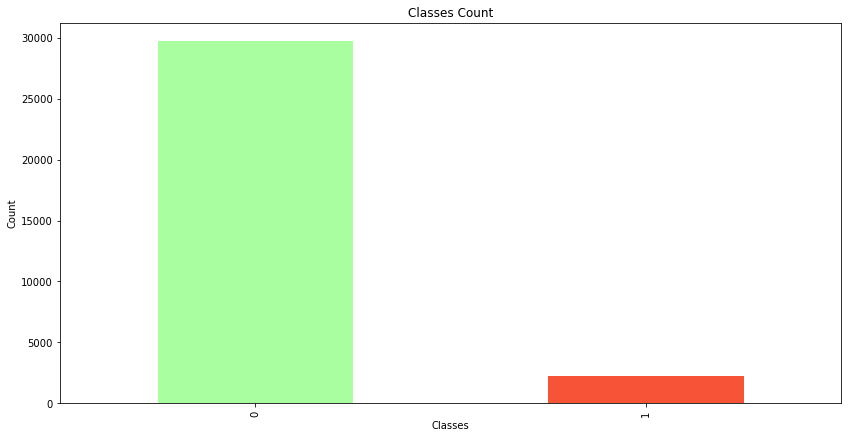

In [8]:
df_tweets['label'].value_counts().plot.bar(figsize = (14, 7),color=['#A9FFA0','#F75437'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Classes Count")
plt.show()

<b>Observation:</b> The classes are unbalaned, ration looks like 1:13. Hence we should try to balance the class during model building

## To cleanup:

In [9]:
nltk.download('stopwords')
tt = TweetTokenizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def textPreprocessing(document):
    # Normalize the casing.
    document.lower()
    
    # Removing user handles, begin with '@’ and '#' Symbol
    document = re.sub(r'@\w+|#|\d','', document)
        
    # Removing URLs.
    document = re.sub(r"http\S+|www\S+|https\S+",'', document, flags=re.MULTILINE)
        
    # Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    Tweet_Tokenizer_list = tt.tokenize(document)
    
    # add additional stop words to be removed from the text
    stop_words = stopwords.words('english')
    stop_punct = list(punctuation)
    stop_punct.extend(['...','``',"''",".."])
    additional_list = ['amp','rt','u',"can't",'ur']
    stop_word_final = stop_words + stop_punct + additional_list
     
    # Removing stop words and Extra cleanup by removing terms with a length of 1.
    clear_tweet = [word for word in Tweet_Tokenizer_list if ((word not in stop_word_final) & (len(word) > 1) & word.isalpha())]
    
    return clear_tweet
    

In [11]:
for index,item in enumerate(features):
    features[index]=textPreprocessing(item) 

## Check out the top terms in the tweets:

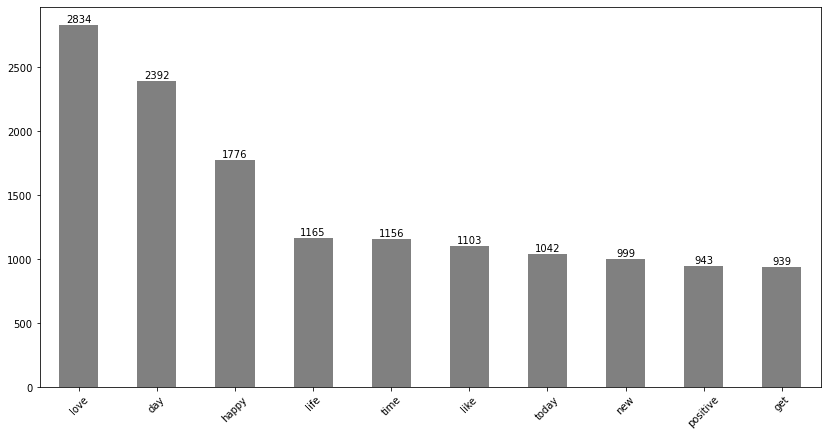

In [12]:
# Get all the tokenized terms into one large list
top_terms = []
for tweet in features:top_terms.extend(tweet)

# Use the counter and find the 10 most common terms
toppr = Counter(top_terms)
common_terms = toppr.most_common(10)
common_words = [val[0] for val in common_terms]
count = [val[1] for val in common_terms]

# Visualizing the top terms
plt.figure(figsize=(14, 7))
ax = pd.Series(count).plot(kind='bar',color = 'grey')
ax.set_xticklabels(common_words)
plt.xticks(rotation=45)
rects = ax.patches

for rect, label in zip(rects, count):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()

## Data formatting for predictive modeling:

In [13]:
df_tweets.head()

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drags, kiss, ..."
1,2,0,"[thanks, left, credit, use, cause, offer, whee..."
2,3,0,"[midday, majesty]"
3,4,0,"[model, love, take, time]"
4,5,0,"[factsguide, society, motivation]"


In [14]:
# Join the tokens back to form strings. This will be required for the vectorizers.
df_tweets['tweet'] =  df_tweets['tweet'].apply(lambda text: ' '.join(text))
df_tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kiss dysfun...
1,2,0,thanks left credit use cause offer wheelchair ...
2,3,0,midday majesty
3,4,0,model love take time
4,5,0,factsguide society motivation


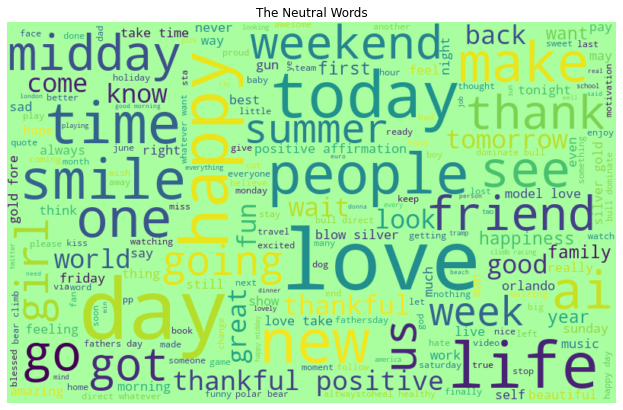

In [15]:
# Visualizing Non-hate words
normal_words =' '.join([text for text in df_tweets['tweet'][df_tweets['label'] == 0]])
wordcloud = WordCloud(background_color = '#A9FFA0',width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

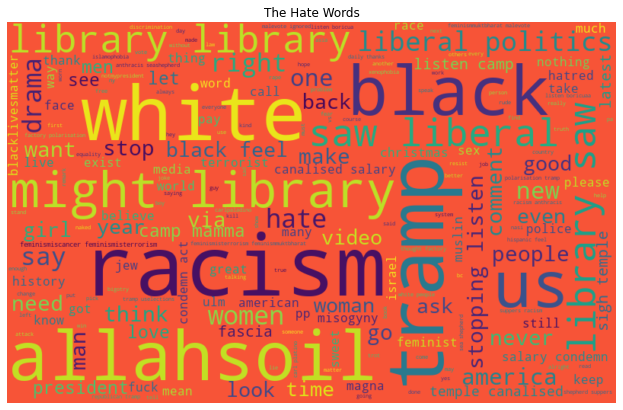

In [16]:
# Visualizing Hate words
hate_words =' '.join([text for text in df_tweets['tweet'][df_tweets['label'] == 1]])
wordcloud = WordCloud(background_color = '#F75437',width=800, height=500, random_state = 0, max_font_size = 110).generate(hate_words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Hate Words')
plt.show()

In [17]:
# Assign X and y
X = df_tweets['tweet']
y = df_tweets['label']

In [18]:
# Perform train_test_split using sklearn 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51,stratify=df_tweets['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


## We’ll use TF-IDF values for the terms as a feature to get into a vector space model:

In [19]:
# Instantiate with a maximum of 5000 terms in your vocabulary 
vectorizer = TfidfVectorizer(max_features=5000)

In [20]:
# Fit into the train data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

In [21]:
# Check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

## Model building: Ordinary Logistic Regression:

In [22]:
# Make predictions for the train and the test set
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
train_predictions = LR_model.predict(X_train)
print(train_predictions)
test_predictions = LR_model.predict(X_test)
print(test_predictions)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


## Model evaluation: Accuracy, recall, and f_1 score:

In [23]:
# Report the accuracy on the training and the test set
print('Accuracy Score on training data:', round(accuracy_score(y_train,train_predictions),2))
print('Accuracy Score on test data', round(accuracy_score(y_test,test_predictions),2))

Accuracy Score on training data: 0.96
Accuracy Score on test data 0.95


In [24]:
# Genarate classification report for trainig and test set
print('Classification Report Training data:-\n')
print(classification_report(y_train,train_predictions))
print('******************************************************\n')
print('Classification Report Testing data:-\n')
print(classification_report(y_test,test_predictions))

Classification Report Training data:-

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.77     25569
weighted avg       0.96      0.96      0.95     25569

******************************************************

Classification Report Testing data:-

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.89      0.28      0.43       448

    accuracy                           0.95      6393
   macro avg       0.92      0.64      0.70      6393
weighted avg       0.94      0.95      0.93      6393



## Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s:

In [25]:
#define the weight of the class labels using inverse ratio
#round(29720/2242)
#weights = {0:1.0,1:13.0}
#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
#Adj_LR_model = LogisticRegression(solver='lbfgs',class_weight=weights)

# Adjust the appropriate class in the LogisticRegression model
Adj_LR_model = LogisticRegression(class_weight="balanced")


## Train again with the adjustment and evaluate:

In [26]:
# Fit and predict using adjusted model
Adj_LR_model.fit(X_train,y_train)
train_predictions = Adj_LR_model.predict(X_train)
test_predictions = Adj_LR_model.predict(X_test)

# Evaluate the predictions on the train/test set: accuracy, recall, and f_1 scorev
print('Classification Report Training data:-\n')
print(classification_report(y_train,train_predictions))
print('******************************************************\n')
print('Classification Report Testing data:-\n')
print(classification_report(y_test,test_predictions))

Classification Report Training data:-

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23775
           1       0.56      0.97      0.71      1794

    accuracy                           0.95     25569
   macro avg       0.78      0.96      0.84     25569
weighted avg       0.97      0.95      0.95     25569

******************************************************

Classification Report Testing data:-

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.45      0.75      0.56       448

    accuracy                           0.92      6393
   macro avg       0.72      0.84      0.76      6393
weighted avg       0.94      0.92      0.93      6393



## Regularization and Hyperparameter tuning:

In [27]:
# Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters
param_grid = {
    'C': [0.01,0.1,1,1.01,1.0001,10,10.01,100,100.01,100.001,1000],
    'penalty': ["l1","l2"],
}

In [28]:
# Use a balanced class weight while instantiating the logistic regression

#define the model with balanced class weights
#weights = {0:1.0,1:1.0}

clf = LogisticRegression(class_weight="balanced")

## Find the parameters with the best recall in cross-validation:

In [29]:
# Choose a stratified 4 fold cross-validation scheme
folds = StratifiedKFold(n_splits=4,random_state=51,shuffle=True)

# Choose ‘recall’ as the metric for scoring
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid, scoring='recall',n_jobs=-1, cv=folds)

# Fit into  the train set
grid_result = grid_search.fit(X_train,y_train)

## What are the best parameters:

In [30]:
print("The Best  parameters:-",grid_search.best_estimator_)

The Best  parameters:- LogisticRegression(C=0.1, class_weight='balanced')


## Predict and evaluate using the best estimator:

In [31]:
# Using the best estimator from the grid search to make predictions on the test set
train_pred_using_param = grid_search.best_estimator_.predict(X_train)
test_pred_using_param = grid_search.best_estimator_.predict(X_test)

In [32]:
print('Classification Report Training data:-\n')
print(classification_report(y_train,train_pred_using_param))
print('******************************************************\n')
print('Classification Report Testing data:-\n')
print(classification_report(y_test,test_pred_using_param))

Classification Report Training data:-

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     23775
           1       0.50      0.89      0.64      1794

    accuracy                           0.93     25569
   macro avg       0.74      0.91      0.80     25569
weighted avg       0.96      0.93      0.94     25569

******************************************************

Classification Report Testing data:-

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5945
           1       0.44      0.75      0.55       448

    accuracy                           0.91      6393
   macro avg       0.71      0.84      0.75      6393
weighted avg       0.94      0.91      0.92      6393



<b>Conclution:
1. The recall on the toxic comments is 0.76
2. The f1 score is 0.96 and 0.58 respectively

## END

##################################################################################